# How to use Pandas

update 210715

------------------

## Base & Theme

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns # plt.style.use("seaborn")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family']='Malgun Gothic'  # Windows
plt.style.use("seaborn-pastel")

## csv import

In [ ]:
df=pd.read_csv("제주특별자치도_제주도장소(POI)데이터_20151231.csv",encoding='cp949',low_memory=False)

## csv save

In [ ]:
df.to_csv('jeoncheori_ver_poi.csv',index=False,encoding='cp949')

## data shape

In [ ]:
df.shape

## data sample

In [ ]:
df.sample()

## making dataframe by '장소명' 

In [ ]:
df[df['장소명']=='5'].head()

## making dataframe   
## by '장소명' == 5 and  '구분'== '레져/스포츠'

In [ ]:
df[(df['장소명']=='5')&(df['구분']=='레져/스포츠')]

## '점포수' in '상권명'== '잠실 관광특구'

In [ ]:
df[df['상권명']=='잠실 관광특구']['점포수']

## Remove duplicate values ​​and create a list

In [ ]:
df[df['구분']=='레져/스포츠']['장소명'].unique().tolist()

## number range

In [ ]:
df['value'].between(10,50)

## Sum Missing Values

In [ ]:
df.isnull().sum()

## Sort numerical values ​​in order

In [ ]:
df['구분'].sort_values().value_counts()

## Resizing the graph

In [ ]:
plt.figure(figsize=(10,10))

## Conditional expression

In [ ]:
titanic_df[(titanic_df['Age']>30) & (titanic_df['Age']<=50)]

## Grouping and Summing

In [ ]:
df.groupby('상권명').sum()

## ValueError:Cannot mask with non-boolean array containing Na/Nan values

In [ ]:
df['주소'].str.contains('서울','na=False')

## count_values -> DataFrame

In [ ]:
df_j_1 = pd.DataFrame({'장소명': co_value.index, 'Values': co_value.values})

plt.figure(figsize=(10,6))
sns.barplot(x= "장소명",y='Values', data=df_j_1.head(10), palette="bright")

## Frame concat

In [ ]:
start = pd.concat([df_0,df_route_st])

## Frame merge

In [ ]:
df_merge = pd.merge(df,df_2, how='left', left_on='sectionId', right_on='section')
df_merge

## orderby column

In [ ]:
df_route=df_route.sort_values(by=['arsId'], axis=0)

## How to remove a column

In [ ]:
df = df.drop(['기준_분기_코드','상권_구분_코드','기준_년_코드','서비스_업종_코드','기준_년_코드'], axis=1)

## Separating Dates

In [ ]:
f_2['데이터기준일자'] = pd.to_datetime(df_2['데이터기준일자'], errors='coerce')

df_2['year'] = df_2['데이터기준일자'].dt.year #연도
df_2['month'] = df_2['데이터기준일자'].dt.month #월
df_2['day'] = df_2['데이터기준일자'].dt.day #일
df_2['dayofweek'] = df_2['데이터기준일자'].dt.dayofweek #요일 (월 = 0)

## sort_values and heading

In [ ]:
df_sang['분기당_매출_금액'].sort_values(ascending=False).head(15)

## Get multiple value from dataframe

In [ ]:
df_ildo2=df_ildo[df_ildo['장소명'].str.contains('호텔|모텔|여관')]

## Get multiple values at the same time by dataframe

In [ ]:
df_sang[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수']]

## how to making dataframe by data

In [ ]:
age_sales=pd.Series({'10대':te_sale,'20대':tw_sale,'30대':th_sale,'40대':fo_sale,'50대':fi_sale})
age_sales


In [ ]:
age_sales2 = { 'Age' : ['10대', '20대', '30대', '40대','50대'], 'Sale':[te_sale,tw_sale,th_sale,fo_sale,fi_sale]}
age_sale_df = pd.DataFrame(age_sales2)
age_sale_df

## SNS barplot 

In [ ]:
# way 1

plt.figure(figsize=(9,6))
sns.barplot(x='Age',y='Sale',data=age_nor)

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='서비스업종',y='점포수',data=service_jumpo_head.reset_index())

In [ ]:
sns.barplot(x='점포수',y='서비스업종',data=service_jumpo_head.reset_index())

# sns.countplot(data=df_seoul, x='시군구명')

In [ ]:
# density graph
df_gu_jum.plot.density(rot=30)

## isin

### finding '-' str

In [ ]:
df=df[~df['장소명'].isin(['-'])]

# map visualization

In [ ]:
# way 1

df[['경도','위도','구']].plot.scatter(x='경도',y='위도',figsize=(12,7),grid=True)

-------------

In [ ]:
# way 2 

plt.figure(figsize=(12,9))
sns.scatterplot(data=df, x="경도",y='위도',hue='구')

---------------

In [ ]:
# way 3 

plt.figure(figsize=(23,18))
sns.scatterplot(data=df, x="경도",y='위도',hue='서비스업종')

-------------------

## how to use folium

In [ ]:
import folium
df['위도'].mean() #위도의 평균값
df['경도'].mean() #경도

In [ ]:
map=folium.Map(location=[df_sample['위도'].mean(),df_sample['경도'].mean()],zoom_start=12)


for n in df_sample.index:
    name=df_sample.loc[n,'서비스업종']
    
    location=[df_sample.loc[n,'위도'], df_sample.loc[n,'경도']]
    adress=df_sample.loc[n,'구']
    popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

## how to use heatmap

In [ ]:
from glob import glob
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
import folium
from folium.plugins import HeatMap


m = folium.Map([35.9078, 127.7669], tiles="stamentoner", zoom_start=6)

HeatMap(sample_w).add_to(m)

m

## box plot 
### Used to check outliers.

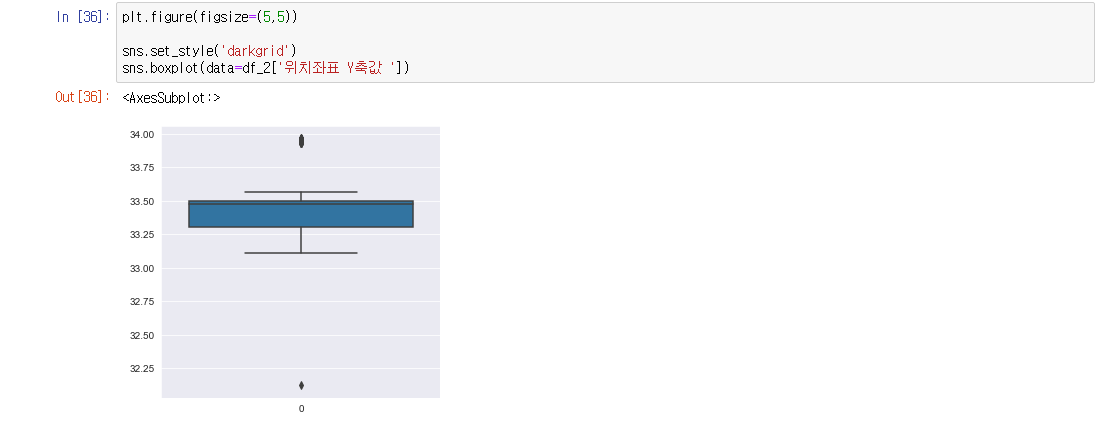

In [14]:
from IPython.display import Image
 
Image("boxplot.png") # code안에서 나오게 할 때

## subplot 
### It is used when writing multiple graphs at the same time.

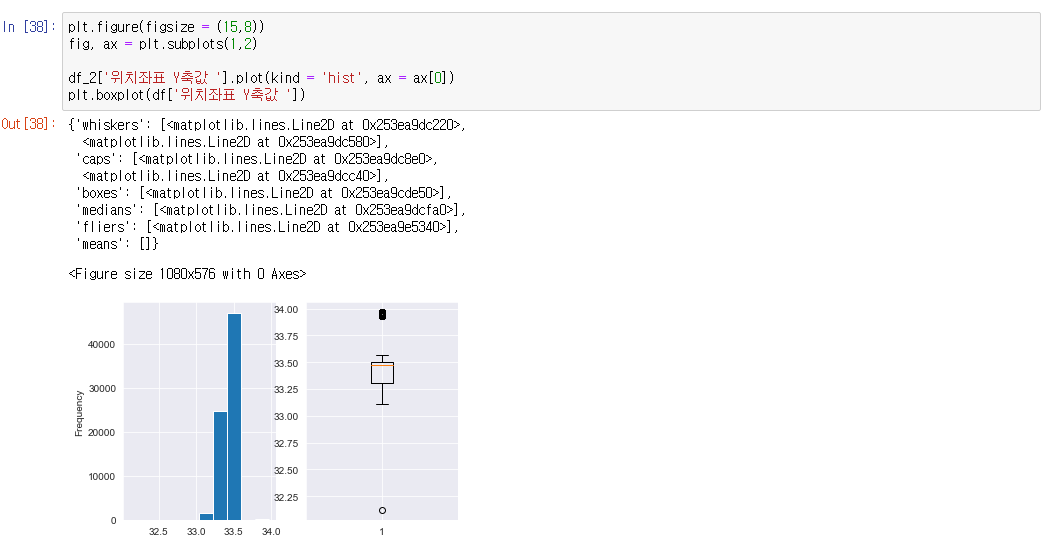

In [16]:
from IPython.display import Image
 
Image("subplot.png") # code안에서 나오게 할 때

## quantile
### 1분위 수와 3분위 안의 수를 구할 때 쓴다.

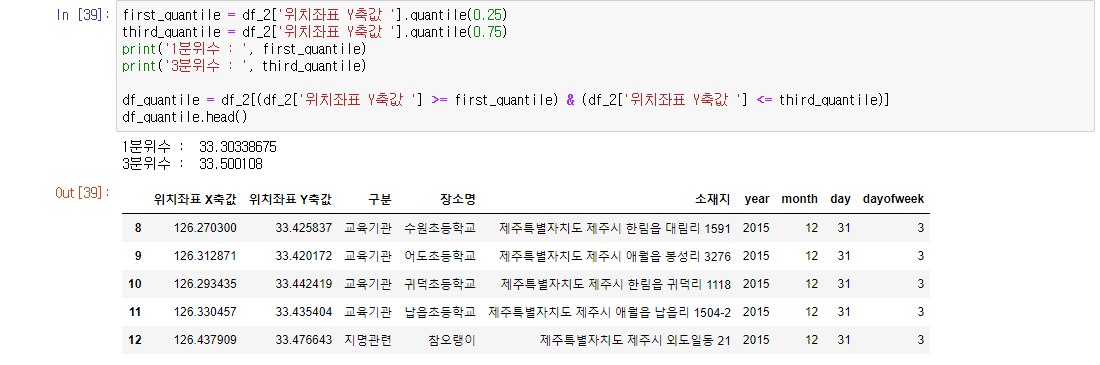

In [15]:
from IPython.display import Image
 
Image("quantile.png") # code안에서 나오게 할 때